In [11]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt

import os


In [12]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [13]:
# Load MNIST data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [14]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=2),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [22]:
from datetime import datetime

current_datetime = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
print(current_datetime)

MODEL_DIR = f'./model/{current_datetime}'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath = f"{MODEL_DIR}/{{epoch:02d}}-{{val_loss:.4f}}.hdf5"
checkpointer = ModelCheckpoint(
    filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)
# Create a directory to save the model if it doesn't exist
# Set the model path format to include the epoch number and validation loss
# Create a checkpoint to save the best model based on validation loss
# Set an early stopping callback to stop training if validation loss doesn't improve for 10 epochs


# Train the model and save the best model based on validation loss
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30,
                    batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])
# Print model accuracy
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

2023-12-25_22-58-02

Epoch 1: val_loss improved from inf to 0.03390, saving model to ./model/2023-12-25_22-58-02/01-0.0339.hdf5


/Users/matia/anaconda3/envs/py38/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.03390 to 0.03123, saving model to ./model/2023-12-25_22-58-02/02-0.0312.hdf5

Epoch 3: val_loss improved from 0.03123 to 0.03066, saving model to ./model/2023-12-25_22-58-02/03-0.0307.hdf5

Epoch 4: val_loss improved from 0.03066 to 0.02736, saving model to ./model/2023-12-25_22-58-02/04-0.0274.hdf5

Epoch 5: val_loss improved from 0.02736 to 0.02645, saving model to ./model/2023-12-25_22-58-02/05-0.0265.hdf5

Epoch 6: val_loss did not improve from 0.02645

Epoch 7: val_loss did not improve from 0.02645

Epoch 8: val_loss did not improve from 0.02645

Epoch 9: val_loss did not improve from 0.02645

Epoch 10: val_loss improved from 0.02645 to 0.02529, saving model to ./model/2023-12-25_22-58-02/10-0.0253.hdf5

Epoch 11: val_loss did not improve from 0.02529

Epoch 12: val_loss did not improve from 0.02529

Epoch 13: val_loss did not improve from 0.02529

Epoch 14: val_loss did not improve from 0.02529

Epoch 15: val_loss did not improve from 0.02529

E

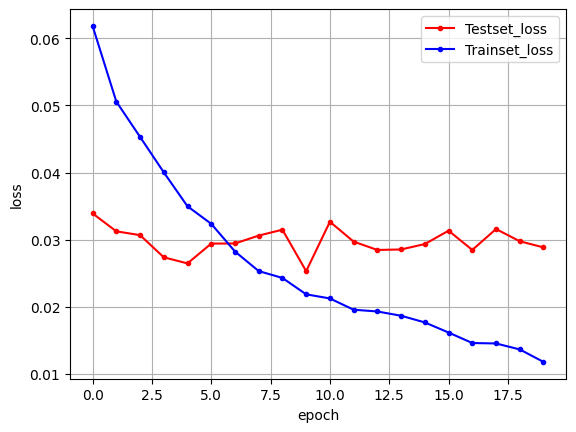

In [23]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()